In [1]:
# %%
# 单元格 1: 配置环境
# 运行此单元格将安装 (或更新) 我们需要的库
print("正在安装 pandas, matplotlib, numpy...")
!pip install --upgrade pandas matplotlib numpy
print("安装完成！")


正在安装 pandas, matplotlib, numpy...
安装完成！


In [2]:
# %%
# 单元格 2: 导入“三剑客”和辅助库
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob   # <--- 文件搜寻官
import os     # <--- 用于处理文件路径和创建文件夹

# 设置 matplotlib 在 notebook 中内联显示
%matplotlib inline

# (可选) 设置绘图风格，让图表更好看
plt.style.use('seaborn-v0_8-ticks')

print("核心库导入成功！准备开始。")


核心库导入成功！准备开始。


In [3]:
# %%
# 单元格 3: 模拟生成一批XRD数据文件
# (如果你有自己的数据，可以跳过此步，并在单元格4中把"xrd_data"换成你自己的文件夹)

print("开始生成模拟XRD数据...")

# 1. 创建一个文件夹来存放数据
data_dir = "my_xrd_data"
os.makedirs(data_dir, exist_ok=True)

# 2. 定义高斯函数 (用于模拟XRD峰)
def gaussian(x, amp, center, sigma):
    return amp * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))

# 3. 定义 2Theta 角度范围
angles = np.linspace(20, 80, 2000) # 20到80度，2000个点

# 4. 模拟5个不同温度下的数据
temperatures = [300, 400, 500, 600, 700]
base_peak_pos = 44.5 # 某个主峰的初始位置

for temp in temperatures:
    # 模拟峰位随温度轻微偏移
    peak_pos = base_peak_pos + (temp - 300) * 0.005
    
    # 模拟两个峰
    peak1 = gaussian(angles, 1000, peak_pos, 0.1)
    peak2 = gaussian(angles, 700, peak_pos + 10, 0.15)
    
    # 模拟背景噪声
    noise = np.random.rand(2000) * 20 + 50
    
    intensity = peak1 + peak2 + noise
    
    # 5. 组装成 DataFrame (模拟Origin的两列表格)
    # 注意：XPS数据也是一样的两列结构，本代码完全适用
    df = pd.DataFrame({
        '2Theta': angles,
        'Intensity': intensity
    })
    
    # 6. 保存到 .txt 文件 (用Tab分隔，不保存行号)
    filename = os.path.join(data_dir, f"SampleA_{temp}C_XRD.txt")
    df.to_csv(filename, sep='\t', index=False)

print(f"成功在 '{data_dir}' 文件夹中生成了 {len(temperatures)} 个模拟TXT文件。")


开始生成模拟XRD数据...
成功在 'my_xrd_data' 文件夹中生成了 5 个模拟TXT文件。


In [4]:
# %%
# 单元格 4: 1. 使用 glob 找到所有数据文件

# 定义数据文件夹路径
data_dir = "my_xrd_data"
# 定义搜索规则：data_dir 文件夹下的所有 .txt 文件
search_pattern = os.path.join(data_dir, "*.txt")

# glob.glob 返回一个包含所有匹配文件路径的【列表】
file_list = glob.glob(search_pattern)

# (可选) 对文件列表进行排序，确保绘图顺序正确
file_list.sort()

print(f"--- '文件搜寻官' glob 报告 ---")
print(f"在 '{data_dir}' 中找到了 {len(file_list)} 个 .txt 文件:")
for f in file_list:
    print(os.path.basename(f)) # os.path.basename 只显示文件名，更整洁


--- '文件搜寻官' glob 报告 ---
在 'my_xrd_data' 中找到了 5 个 .txt 文件:
SampleA_300C_XRD.txt
SampleA_400C_XRD.txt
SampleA_500C_XRD.txt
SampleA_600C_XRD.txt
SampleA_700C_XRD.txt


--- '自动化绘图师' Matplotlib 开始工作 ---


C:\Users\hpf_2\AppData\Local\Temp\ipykernel_32868\3652593654.py:52: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hpf_2\AppData\Local\Temp\ipykernel_32868\3652593654.py:52: UserWarning: Glyph 20301 (\N{CJK UNIFIED IDEOGRAPH-4F4D}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hpf_2\AppData\Local\Temp\ipykernel_32868\3652593654.py:52: UserWarning: Glyph 21319 (\N{CJK UNIFIED IDEOGRAPH-5347}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hpf_2\AppData\Local\Temp\ipykernel_32868\3652593654.py:52: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hpf_2\AppData\Local\Temp\ipykernel_32868\3652593654.py:52: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\hpf_2\AppData\Local\Temp\ipykernel_32868\3652593654.py:52: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8})

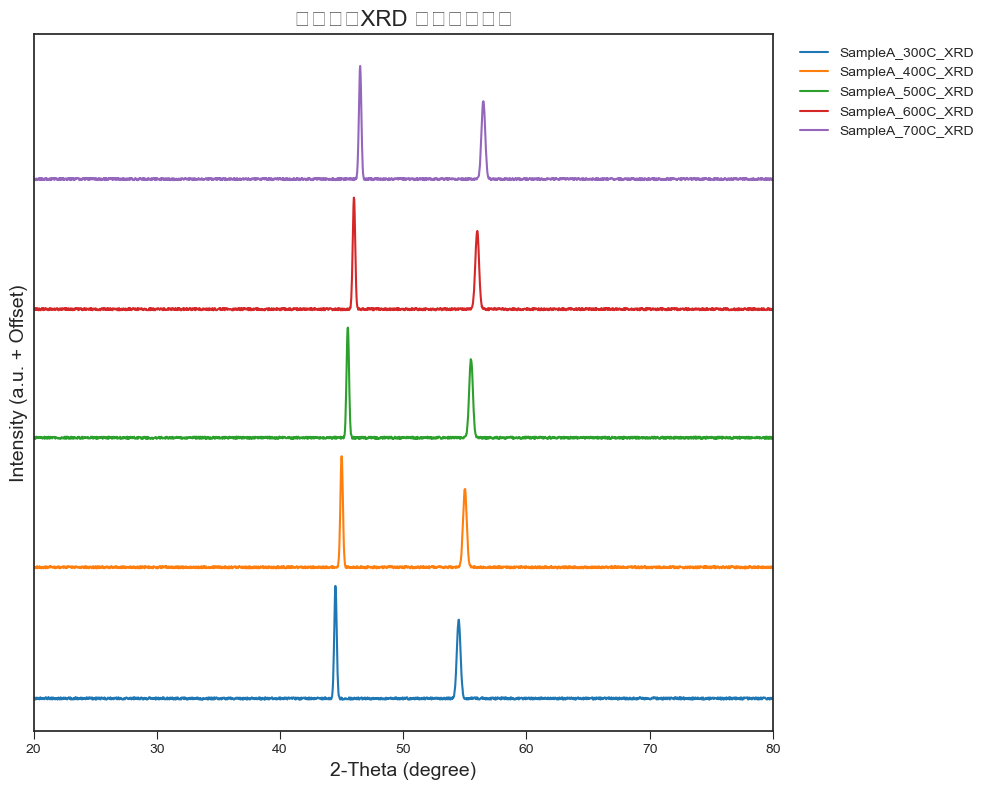


--- 任务完成！ ---
自动化图表已保存为: automated_xrd_stacked_plot.png


In [5]:
# %%
# 单元格 5: 2. 自动化循环绘图（堆叠图）

print("--- '自动化绘图师' Matplotlib 开始工作 ---")

# 1. 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(10, 8)) # 10英寸宽, 8英寸高

# 2. 定义一个偏移量，用于堆叠
offset = 0

# 3. 灵魂所在：遍历 glob 找到的文件列表
for file_path in file_list:
    
    # 4. (Pandas) 读取数据
    # sep='\t' 告诉pandas数据是用Tab键分隔的
    data = pd.read_csv(file_path, sep='\t')
    
    # 5. (Matplotlib) 绘图
    # 我们将Y轴数据 (Intensity) 加上一个偏移量
    
    # (可选) 从文件名提取标签，用于图例
    # 例如： "my_xrd_data/SampleA_300C_XRD.txt" -> "SampleA_300C_XRD"
    label = os.path.basename(file_path).replace(".txt", "")
    
    ax.plot(data['2Theta'],    # X轴
            data['Intensity'] + offset, # Y轴 + 偏移
            label=label,      # 设置图例
            linewidth=1.5)    # 设置线宽
    
    # 6. 更新下一个图的偏移量
    # 我们让下一个图的Y轴起点 = 上一个图Y轴最大值的 1.1 倍
    offset += data['Intensity'].max() * 1.1 

# 7. 绘图收尾工作 (设置坐标轴、标题等)
ax.set_xlabel('2-Theta (degree)', fontsize=14)
ax.set_ylabel('Intensity (a.u. + Offset)', fontsize=14)
ax.set_title('原位升温XRD 自动化堆叠图', fontsize=16)

# (可选) 设置X轴范围
ax.set_xlim(angles.min(), angles.max()) 

# (可选) 关闭Y轴的刻度值，因为堆叠图的Y轴数值没有意义
ax.set_yticklabels([])
ax.set_yticks([])

# 8. 显示图例
# (可选) bbox_to_anchor 将图例放在画布外面，防止遮挡
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# (可选) 自动调整布局，防止标签被裁切
plt.tight_layout()

# 9. 保存图像 (你可以保存为PNG, PDF, SVG等)
output_filename = "automated_xrd_stacked_plot.png"
plt.savefig(output_filename, dpi=300) # 300 DPI, 出版级清晰度

# 10. 显示图像
plt.show()

print(f"\n--- 任务完成！ ---")
print(f"自动化图表已保存为: {output_filename}")
